In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Implementing Multi-Dimensional Gradient Descent
def gradient_descent(grad_f, start, alpha, n_iter):
    """
    Performs gradient descent to find the minimum of a function.
    
    Args:
        grad_f: A function that computes the gradient.
        start: The starting point (x, y).
        alpha: The learning rate.
        n_iter: The number of iterations.
        
    Returns:
        A list of points visited during the descent.
    """
    path = [start]
    x = np.array(start)
    for _ in range(n_iter):
        grad = grad_f(x[0], x[1])
        x = x - alpha * grad
        path.append(x)
    return np.array(path)

## A More Complex Example: The Rosenbrock Function

The Rosenbrock function is a classic optimization problem, known for its narrow, curved valley. It is defined as:
$$ f(x, y) = (a - x)^2 + b(y - x^2)^2 $$
A common choice for the constants is $a=1$ and $b=100$. The minimum is at $(a, a^2)$, which is $(1, 1)$ for our choice of constants.

Let's define and visualize this function.

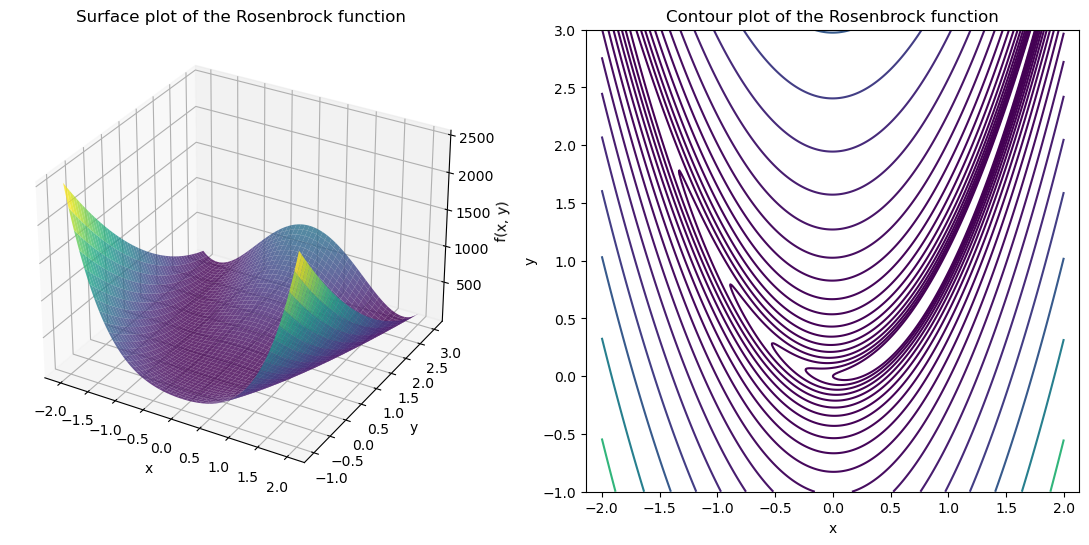

In [3]:
# Define the Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

# Create a grid for the Rosenbrock function
x_rosen = np.linspace(-2, 2, 400)
y_rosen = np.linspace(-1, 3, 400)
X_rosen, Y_rosen = np.meshgrid(x_rosen, y_rosen)
Z_rosen = rosenbrock(X_rosen, Y_rosen)

# Plot the Rosenbrock function
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_rosen, Y_rosen, Z_rosen, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Surface plot of the Rosenbrock function')

ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X_rosen, Y_rosen, Z_rosen, levels=np.logspace(0, 3.5, 20), cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot of the Rosenbrock function')
ax2.axis('equal')
plt.show()

## Gradient of the Rosenbrock Function

The partial derivatives of the Rosenbrock function are:
$$ \frac{\partial f}{\partial x} = -2(a - x) - 4bx(y - x^2) $$
$$ \frac{\partial f}{\partial y} = 2b(y - x^2) $$
So the gradient is:
$$ \nabla f(x, y) = \left( -2(a - x) - 4bx(y - x^2), 2b(y - x^2) \right) $$

In [4]:
# Define the gradient of the Rosenbrock function
def grad_rosenbrock(x, y, a=1, b=100):
    dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dy = 2 * b * (y - x**2)
    return np.array([dx, dy])

## Gradient Descent on the Rosenbrock Function

Now, let's apply gradient descent to the Rosenbrock function. The narrow valley makes it tricky, and the choice of learning rate is even more important. A small learning rate is needed to navigate the curve of the valley without overshooting.

In [15]:
# Run gradient descent on the Rosenbrock function
start_point_rosen = (-1.5, 2.5)
learning_rate_rosen = 0.001
iterations_rosen = 5000
path_rosen = gradient_descent(grad_rosenbrock, start_point_rosen, learning_rate_rosen, iterations_rosen)

## Visualizing the Descent on the Rosenbrock Function

Let's visualize the path of the gradient descent on the contour plot of the Rosenbrock function.

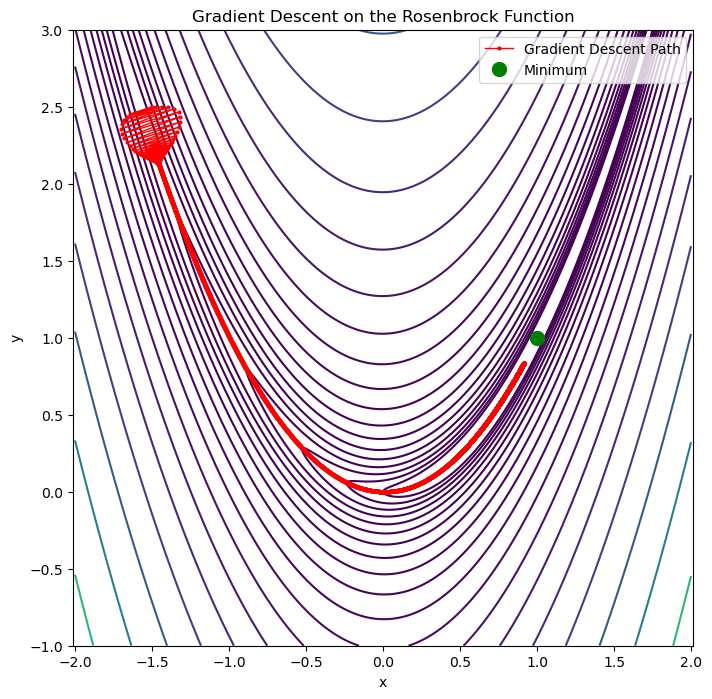

In [16]:
# Plot the path on the contour plot
plt.figure(figsize=(8, 8))
contour = plt.contour(X_rosen, Y_rosen, Z_rosen, levels=np.logspace(0, 3.5, 20), cmap='viridis')
plt.plot(path_rosen[:, 0], path_rosen[:, 1], 'r-o', markersize=2, linewidth=1, label='Gradient Descent Path')
plt.plot(1, 1, 'go', markersize=10, label='Minimum') # Mark the minimum
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent on the Rosenbrock Function')
plt.axis('equal')
plt.legend()
plt.show()

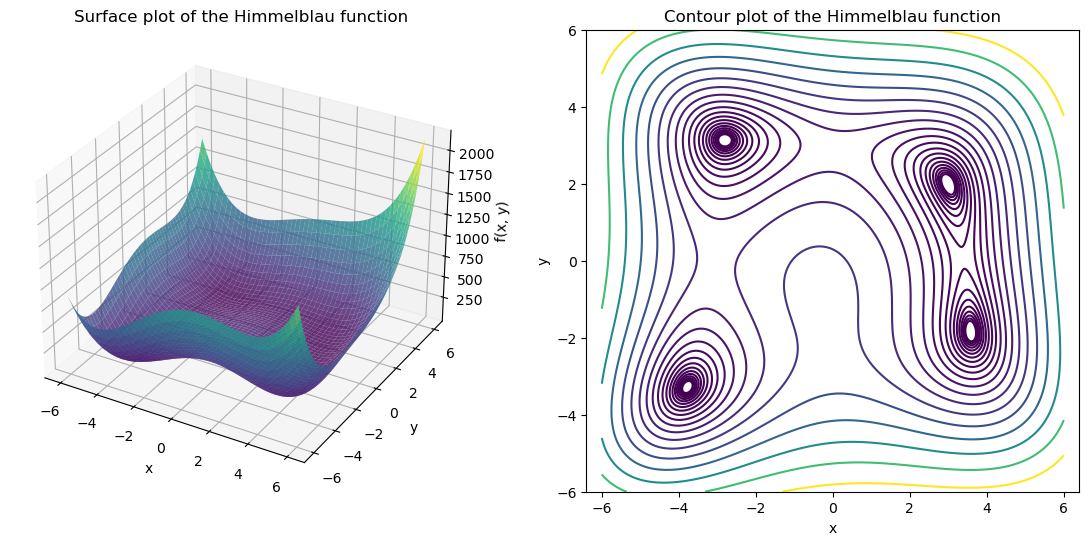

In [17]:
# Define the Himmelblau function
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid for the Himmelblau function
x_himmel = np.linspace(-6, 6, 400)
y_himmel = np.linspace(-6, 6, 400)
X_himmel, Y_himmel = np.meshgrid(x_himmel, y_himmel)
Z_himmel = himmelblau(X_himmel, Y_himmel)

# Plot the Himmelblau function
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X_himmel, Y_himmel, Z_himmel, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Surface plot of the Himmelblau function')

ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X_himmel, Y_himmel, Z_himmel, levels=np.logspace(0, 3, 20), cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot of the Himmelblau function')
ax2.axis('equal')
plt.show()